<a href="https://colab.research.google.com/github/seyhosseini/AML-2022/blob/main/AML_HW07_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np


# Download MNIST data

In [ ]:
!gdown --id '1fAW-pvhBWiXxE-H-WEOurS1Ta4V5mYe0'
!gdown --id '1zSVOn9lJa4eF-jubtZwdtO-t0UScnJk0'

import pickle
with open('/content/mnist_train.pickle', 'rb') as data:
    mnist_train = pickle.load(data)
with open('/content/mnist_train.pickle', 'rb') as data:
    mnist_test = pickle.load(data)



Downloading...
From: https://drive.google.com/uc?id=1fAW-pvhBWiXxE-H-WEOurS1Ta4V5mYe0
To: /content/mnist_train.pickle
100% 47.5M/47.5M [00:00<00:00, 147MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zSVOn9lJa4eF-jubtZwdtO-t0UScnJk0
To: /content/mnist_test.pickle
100% 7.92M/7.92M [00:00<00:00, 71.8MB/s]


In [ ]:
1 open('/content/mnist_train.pickle', 'rb')
2 z_dim*2?
3 An resampling
4 argmax

# <font color=red>TO-DO #1. </font> Variational Auto-encoder 

<font color=red>Complete the code below to create a variational auto-encoder. </font> The variational auto-encoder should have the following modules 

1. An encoder nn.Sequential, consisting of
>* Linear layer that takes in image size and outputs h_dim channels, followed by a LeakyReLU(0.2),
>* Linear layer that takes in h_dim channels and outputs h_dim channels, followed by a LeakyReLU(0.2),
>* Linear layer that takes in h_dim channels and outputs z_dim*2 channels, followed by Tanh activation




2. An decoder implemented using nn.Sequential, consisting of 
>* Linear layer that takes in z_dim channels and outputs h_dim channels, followed by LeakyReLU(0.2)
>* Linear layer that takes in h_dim channels and outputs h_dim channels, followed by LeakyReLU(0.2)
>* Linear layer that takes in h_dim channels and outputs 1 channels, followed by Sigmoid activation

3. An resampling layer, with inputs logvar and mu

  Here logvar_i $= \log (\sigma_i^2) $, where $\sigma_i$ is the standard deviation along the $i^{\rm th}$ direction. The z vector is obtained as 

  $$z_i = \mu_i + \sigma_i ~ n_i,$$

where $n_i$ is zero mean Gaussian noise with unit variance. When there are z_dim=2, $\boldsymbol \mu = (\mu_1,\mu_2)$

4. A forward method, which calls
>* Encoder
>* Resampling layer, which uses the mean and logvar parameters
>* Decoder

and returns the images, mu, and logvar parameters


In [ ]:
class VAE(nn.Module):
    def __init__(self, image_size=784, h_dim=400, z_dim=2):
        super(VAE, self).__init__()
       
        self.encoder = 0 # MODIFY WITH YOUR CODE
        self.decoder = 0 # MODIFY WITH YOUR CODE
    
    def resample(self, mu, logvar):
        # YOUR CODE HERE
        return z
    
    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = torch.chunk(h, 2, dim=1) #split the output of the decoder into mu and logvar
        z = self.resample(mu, logvar)
        return self.decoder(z), mu, logvar

 # <font color=red>TO-DO #2. </font>  Define the loss function

<font color=red> Complete the code below to define the auto-encoder loss function, consisting of binary cross-entropy loss and KL divergence loss. </font> 

$L(\theta,\phi)^* = \arg \max_{\theta,\phi}\underbrace{\sum_i \mathbb E_{\mathbf h \sim q_{\phi}(h|\mathbf x_i)} BCE\left(g_{\theta}({\mathbf h}),\mathbf x_i\right)}_{\mbox{data term}}-  \underbrace{\frac{1}{2}\left[\sum_{i=1}^d(1+\log\sigma_i^2 - \sigma_i^2- \mu_i^2)\right]}_{\mbox{deviation from prior; zero mean unit Gaussian}} $

Here, BCE denotes the binary cross entropy loss between the output of the decoder $g_{\theta}(\mathbf h)$ and the true output $\mathbf x_i$
Note that the auto-encoder is outputing ${\rm logvar}=\log \sigma^2$, and hence $\sigma^2 = \exp(\rm logvar)$

In [ ]:
def loss_fn(recon_x, x, mu, logvar):
    BCE = 0 # data term
    KLD = 0 # regularization term
    return BCE + KLD


In [ ]:

def flatten(x):
    return to_var(x.view(x.size(0), -1))

def to_var(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x)

 # <font color=red>TO-DO #3. </font>  VAE optimization

In [ ]:
data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)

vae = VAE()
if torch.cuda.is_available():
    vae.cuda()
    
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

epochs = 40
for epoch in range(epochs):
  for idx, (images, _) in enumerate(data_loader):
   # YOUR CODE HERE
        
  print("Epoch[{}/{}] Loss: {:.3f}".format(epoch+1, epochs, loss.data/images.shape[0]))
    


Epoch[1/40] Loss: 168.282
Epoch[2/40] Loss: 157.429
Epoch[3/40] Loss: 129.627
Epoch[4/40] Loss: 158.580
Epoch[5/40] Loss: 142.718
Epoch[6/40] Loss: 138.757
Epoch[7/40] Loss: 148.910
Epoch[8/40] Loss: 153.867
Epoch[9/40] Loss: 148.832
Epoch[10/40] Loss: 148.246
Epoch[11/40] Loss: 133.485
Epoch[12/40] Loss: 130.226
Epoch[13/40] Loss: 123.585
Epoch[14/40] Loss: 153.609
Epoch[15/40] Loss: 145.775
Epoch[16/40] Loss: 150.157
Epoch[17/40] Loss: 141.222
Epoch[18/40] Loss: 139.780
Epoch[19/40] Loss: 146.190
Epoch[20/40] Loss: 147.392
Epoch[21/40] Loss: 146.275
Epoch[22/40] Loss: 147.595
Epoch[23/40] Loss: 133.814
Epoch[24/40] Loss: 134.965
Epoch[25/40] Loss: 128.816
Epoch[26/40] Loss: 134.475
Epoch[27/40] Loss: 144.027
Epoch[28/40] Loss: 155.773
Epoch[29/40] Loss: 142.900
Epoch[30/40] Loss: 131.972
Epoch[31/40] Loss: 122.975
Epoch[32/40] Loss: 141.488
Epoch[33/40] Loss: 134.238
Epoch[34/40] Loss: 149.316
Epoch[35/40] Loss: 135.199
Epoch[36/40] Loss: 129.049
Epoch[37/40] Loss: 151.614
Epoch[38/4

# Visualize the embedding

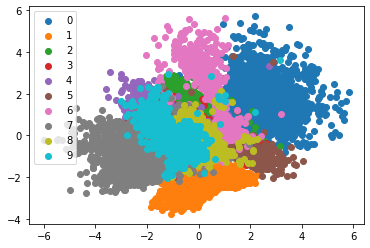

In [ ]:
display_loader = torch.utils.data.DataLoader(mnist_train, batch_size=25000, shuffle=True)

images, labels = next(iter(display_loader))
images = flatten(images)
recon_images, mu, logvar = vae(images)
mu = mu.detach().cpu()

plt.figure()
legtext = []

for i in range(10):
  idx = (labels ==i)
  plt.scatter(mu[idx,0],mu[idx,1])
  legtext = np.hstack((legtext,str(i)))
  plt.legend(legtext)

<Figure size 1296x1296 with 0 Axes>

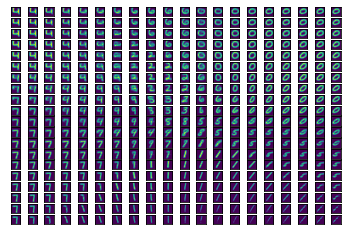

In [ ]:

mtx_size = 20
[x,y] = np.meshgrid(np.linspace(-4,4,mtx_size),np.linspace(4,-4,mtx_size))
embedding = np.stack((x.ravel(),y.ravel()))
embedding = torch.tensor(embedding).T.cuda()
embedding = embedding.type(torch.cuda.FloatTensor)
recons = vae.decoder(embedding)
recons = recons.detach().cpu().numpy()

recons.shape
plt.figure(figsize=(18, 18))
fig,ax = plt.subplots(mtx_size,mtx_size)

i = 0
for x in range(mtx_size):
  for y in range(mtx_size):
    i = x*mtx_size + y
    ax[x][y].imshow(np.reshape(recons[i,],(28,28)))
    ax[x][y].get_xaxis().set_visible(False)
    ax[x][y].get_yaxis().set_visible(False)